# Urban canyon study

This example shows the behavior of sparrowpy in the simulation of an urban canyon under different simulation conditions

In [1]:
"""Test the radiosity.Radiosity module."""
import pyfar as pf
import sparrowpy as sp
from run_simu import run_simu, run_simu_pure
import numpy as np
import matplotlib.pyplot as plt
import os

%load_ext memory_profiler

%matplotlib inline
# %matplotlib ipympl

basepath=os.path.join(os.getcwd(),"out")

Lets define our room and source position.

In [2]:
def urban_canyon_stub(length_x, length_y, length_z):
    """Create a shoebox room with the given dimensions.

    Parameters
    ----------
    length_x : float
        Length of the urban canyon in meters.
    length_y : float
        width of the urban canyon in meters.
    length_z : float
        height of the urban canyon in meters.

    Returns
    -------
    room : list[geo.Polygon]
        List of the walls of the room.

    """
    return [
        sp.geometry.Polygon(
            [[0, 0, 0], [length_x, 0, 0],
            [length_x, 0, length_z], [0, 0, length_z]],
            [0, 0, 1], [0, 1, 0]),
        sp.geometry.Polygon(
            [[0, 0, 0],[0, length_y, 0],
            [length_x, length_y, 0], [length_x, 0, 0 ]],
            [1, 0, 0], [0, 0, 1]),
        sp.geometry.Polygon(
            [[0, length_y, 0], [length_x, length_y, 0],
            [length_x, length_y, length_z], [0, length_y, length_z]],
            [0, 0, -1], [0, -1, 0]),
        ]

In [3]:
# Define parameters
X = 90
Y = 12
Z = 6

# create geometry
canyon = urban_canyon_stub(X, Y, Z)
source = pf.Coordinates(20, 6, 1)
receiver = pf.Coordinates(70, 6, 2)

In [4]:
run_simu(walls=urban_canyon_stub(1,1,1),
        source=pf.Coordinates(.5,.5,.5),
        receiver=pf.Coordinates(.5,.5,.5),
        patch_size=1)

c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:84: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(res)
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order
c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:101: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


(TimeData:
 (1, 1) channels with 5 samples,
 [0.3950488567352295,
  0.45644140243530273,
  0.3090362548828125,
  0.09914350509643555])

## diffuse vs custom

In [ ]:
f_array = np.array([250, 500, 1000, 2000, 4000])
airatt = np.array([1.309749765923859,2.7281341349384447, 4.664731873821475,
                   9.88701558869792,29.665528426392616])/1000
order=30
dur=1.
step=.002
psize=2

In [12]:
etc_diff=run_simu_pure( walls=canyon,
                        source=source,
                        receiver=receiver,
                        patch_size=psize,
                        time_step=step,
                        duration=dur,
                        refl_order=order,
                        freq=f_array,
                        att=airatt)


c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:145: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(2)
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order
c:\Users\jotag\Documents\dev\sparapy\examples\run_simu.py:182: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  radi.set_wall_brdf(


In [ ]:
filename = "resources\\triangle_sim_optimal.s_d.sofa"
etc_file=run_simu_pure( walls=canyon,
                        source=source,
                        receiver=receiver,
                        patch_size=psize,
                        time_step=step,
                        duration=dur,
                        refl_order=order,
                        freq=f_array,
                        att=airatt,
                        file=filename )

SOFA file contained custom entries
----------------------------------
SourceWeights, ReceiverWeights, SampleStructuralWavelength, SampleStructuralWavelengthX, SampleStructuralWavelengthY, SampleModelScale, SampleDiameter, SampleSymmetryAzimuth, SampleSymmetryRotational, SampleStructuralDepth, SampleBaseplateHeight, SpeedOfSound


  0%|          | 0/484 [00:00<?, ?it/s]c:\Users\jotag\Documents\dev\sparapy\examples\reduce_s_d.py:81: ComplexWarning: Casting complex values to real discards the imaginary part
  bsc_mirrored.freq[i_source, :, :] = bsc.freq[i_source_mirror,
100%|██████████| 484/484 [00:00<00:00, 1448.28it/s]


In [ ]:
pf.io.write(os.path.join(basepath,"proof_etcs.far"),compress=False,
            diffuse_etc=etc_diff,
            custom_etc=etc_file,
            freqs=f_array)

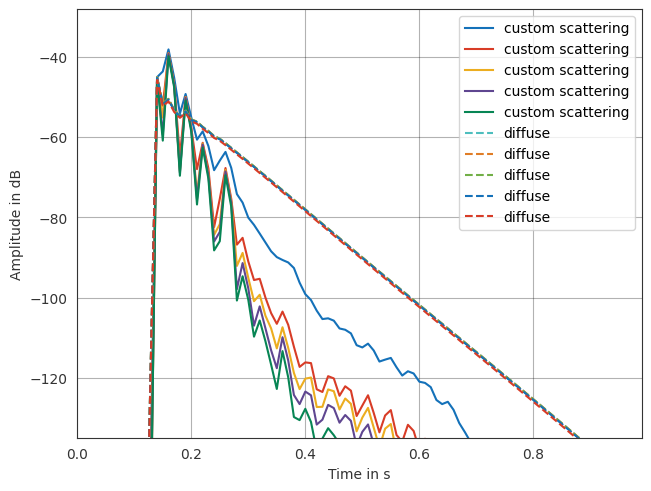

In [ ]:
pf.plot.time(etc_file, dB=True, log_prefix=10,
             label="custom scattering",
             linestyle="-")
pf.plot.time(etc_diff, dB=True, log_prefix=10,
             label="diffuse",
             linestyle="--")
plt.legend()

In [ ]:
%load_ext watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 9.1.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 68 Stepping 1, AuthenticAMD
CPU cores   : 16
Architecture: 64bit

sparrowpy : 0.1.0
pyfar     : 0.7.3
numpy     : 1.26.4
matplotlib: 3.10.1

